### Group 5 Unsupervised Learning Mini Project

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt 

In [5]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [6]:
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [7]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [8]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [9]:
wine_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [10]:
wine_df.shape

(178, 14)

In [11]:
wine_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [12]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)





In [13]:
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


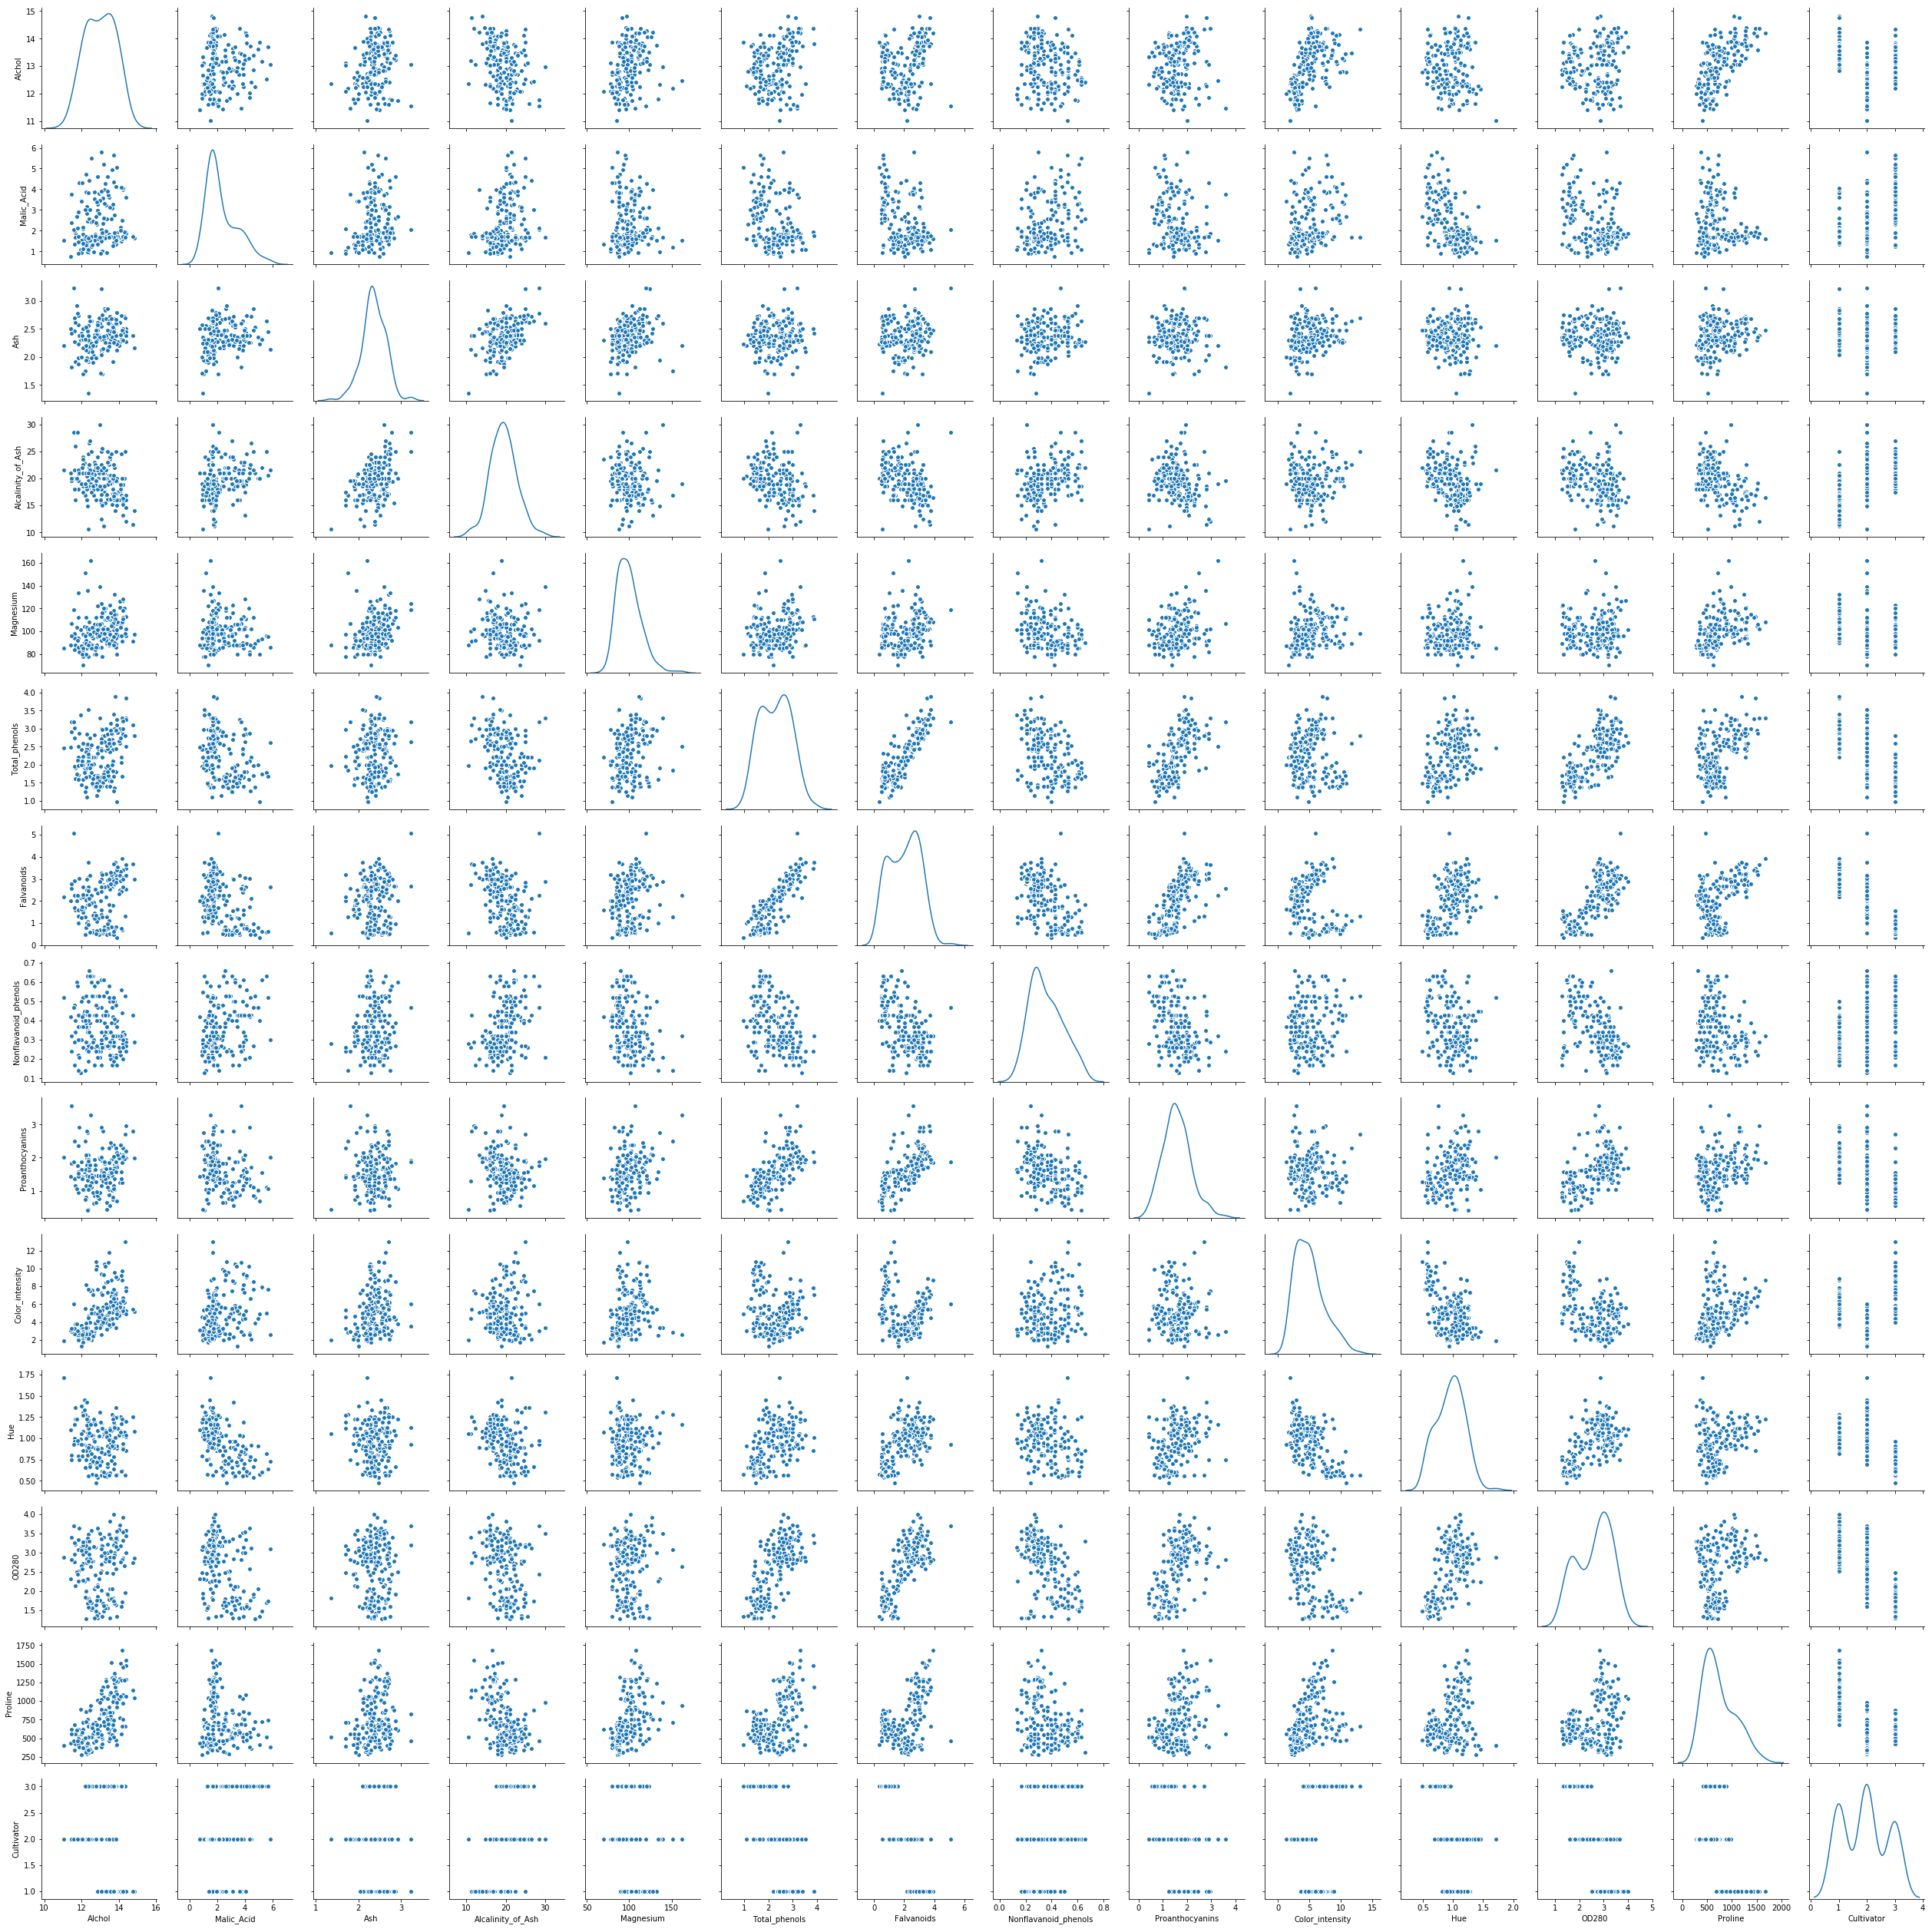

In [14]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

t = pd.concat([X,y], axis=1)
mpg_df_attr = t.iloc[:, :]
sns.pairplot(mpg_df_attr, diag_kind='kde') 

In [15]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

corr = X.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Alchol,1,0.094,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.072,0.072,0.64
Malic_Acid,0.094,1,0.16,0.29,-0.055,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,0.21,0.16,1,0.44,0.29,0.13,0.12,0.19,0.0097,0.26,-0.075,0.0039,0.22
Alcalinity_of_Ash,-0.31,0.29,0.44,1,-0.083,-0.32,-0.35,0.36,-0.2,0.019,-0.27,-0.28,-0.44
Magnesium,0.27,-0.055,0.29,-0.083,1,0.21,0.2,-0.26,0.24,0.2,0.055,0.066,0.39
Total_phenols,0.29,-0.34,0.13,-0.32,0.21,1,0.86,-0.45,0.61,-0.055,0.43,0.7,0.5
Falvanoids,0.24,-0.41,0.12,-0.35,0.2,0.86,1,-0.54,0.65,-0.17,0.54,0.79,0.49
Nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1,-0.37,0.14,-0.26,-0.5,-0.31
Proanthocyanins,0.14,-0.22,0.0097,-0.2,0.24,0.61,0.65,-0.37,1,-0.025,0.3,0.52,0.33
Color_intensity,0.55,0.25,0.26,0.019,0.2,-0.055,-0.17,0.14,-0.025,1,-0.52,-0.43,0.32


In [16]:
#### 1. Standardize​ ​the d-dimensional​ ​dataset.

# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)   

X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
##### 2. Construct​ ​the covariance​ ​matrix.
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 

In [18]:
##### 3. Decompose​ ​the​ ​covariance​ ​matrix​ ​into​ ​its​ ​eigenvectors​ ​and​ ​eigenvalues.

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.

In [19]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.732437,2.511081,1.454242,0.924166,0.858049,0.645282,0.554141,0.103962,0.350466,0.169724,0.290512,0.227064,0.25232


In [20]:
#  Sort eigenvalues in descending order
##### 4. select k eigenvectors​ ​that​ ​correspond​ ​to​ ​the k largest​ ​eigenvalues,​ ​where k is​ ​the​ ​dimensionality of​ ​the​ ​new​ ​feature​ ​subspace​ ​( k≤d ).

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.732436977583598, 2.511080929645125, 1.4542418678464697, 0.9241658668248743, 0.8580486765371126, 0.6452822124678554, 0.5541414662457841, 0.3504662749462545, 0.2905120326939775, 0.25232001036082513, 0.22706428173088547, 0.16972373898012164, 0.10396199182075283]


In [21]:
##### 5. Construct​ ​a​ ​projection​ ​matrix W from​ ​the​ ​"top" k eigenvectors.
P_reduce = np.array(eigvectors_sort[0:8]).transpose()
P_reduce

array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
         0.21353865,  0.05639636,  0.39613926],
       [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
         0.53681385, -0.42052391,  0.06582674],
       [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
         0.15447466,  0.14917061, -0.17026002],
       [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
        -0.10082451,  0.28696914,  0.42797018],
       [-0.14199204,  0.299634  , -0.13075693, -0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.15636143],
       [-0.39466085,  0.06503951, -0.14617896,  0.19806835, -0.14931841,
        -0.0841223 ,  0.02792498, -0.40593409],
       [-0.4229343 , -0.00335981, -0.1506819 ,  0.15229479, -0.10902584,
        -0.01892002,  0.06068521, -0.18724536],
       [ 0.2985331 ,  0.02877949, -0.17036816, -0.20330102, -0.50070298,
        -0.25859401, -0.59544729, -0.23328465],
       [-0.31342949,  0.03930172

In [22]:
##### 6. Transform​ ​the d-dimensional​ ​input​ ​dataset x using​ ​the​ ​projection​ ​matrix W to​ ​obtain​ ​the new k-dimensional​ ​feature​ ​subspace


Proj_data = np.dot(X,P_reduce)
Proj_data

array([[-325.63701986,  436.86869785,  108.88163351, ...,  132.31410219,
        -117.41697559,  119.00409322],
       [-317.81207811,  422.14349242,  113.29975742, ...,  130.65770303,
        -108.88764725,  119.02578976],
       [-355.26773962,  472.70710859,  125.24713289, ...,  145.04112647,
        -117.89216816,  138.54014813],
       ...,
       [-253.62404757,  353.68433097,   79.33598665, ...,  103.24042797,
         -96.26929839,   94.58186938],
       [-255.58688362,  354.63659314,   79.85539632, ...,  103.23183436,
         -96.23585365,   95.03718288],
       [-170.73164465,  246.11560878,   44.51285939, ...,   69.46565538,
         -66.20257999,   67.31052298]])

In [23]:

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


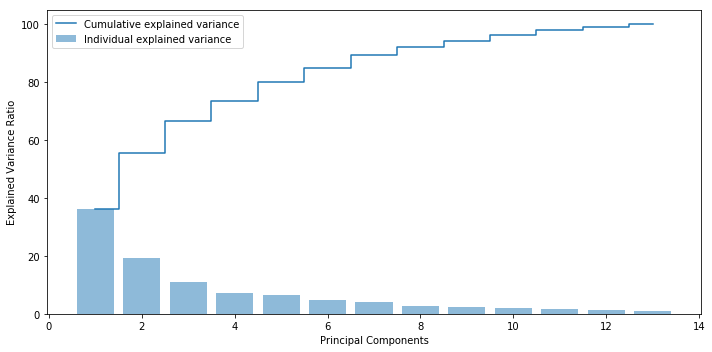

In [24]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [25]:
##### Construct​ ​a​ ​projection​ ​matrix W from​ ​the​ ​"top" k eigenvectors.
# NOTE - The covariance between PCA dimsions is very close to zero. 
# Whatever little correlation we see is fluke and due to data noise

X_reduced = pd.DataFrame(PCA(n_components=6).fit_transform(X))
cov_matrix = np.cov(X_reduced.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 9.92017895e+04 -1.87836382e-15 -1.52812062e-14  1.01591973e-13
   4.15371360e-14  2.61131035e-14]
 [-1.87836382e-15  1.72535266e+02 -6.93104294e-15  8.93500328e-15
   3.32990956e-16  4.46669580e-16]
 [-1.52812062e-14 -6.93104294e-15  9.43811370e+00  7.12944227e-16
   5.69995634e-18 -6.60618587e-17]
 [ 1.01591973e-13  8.93500328e-15  7.12944227e-16  4.99117861e+00
  -3.58992111e-16  5.80314646e-16]
 [ 4.15371360e-14  3.32990956e-16  5.69995634e-18 -3.58992111e-16
   1.22884523e+00 -7.90328255e-17]
 [ 2.61131035e-14  4.46669580e-16 -6.60618587e-17  5.80314646e-16
  -7.90328255e-17  8.41063869e-01]]


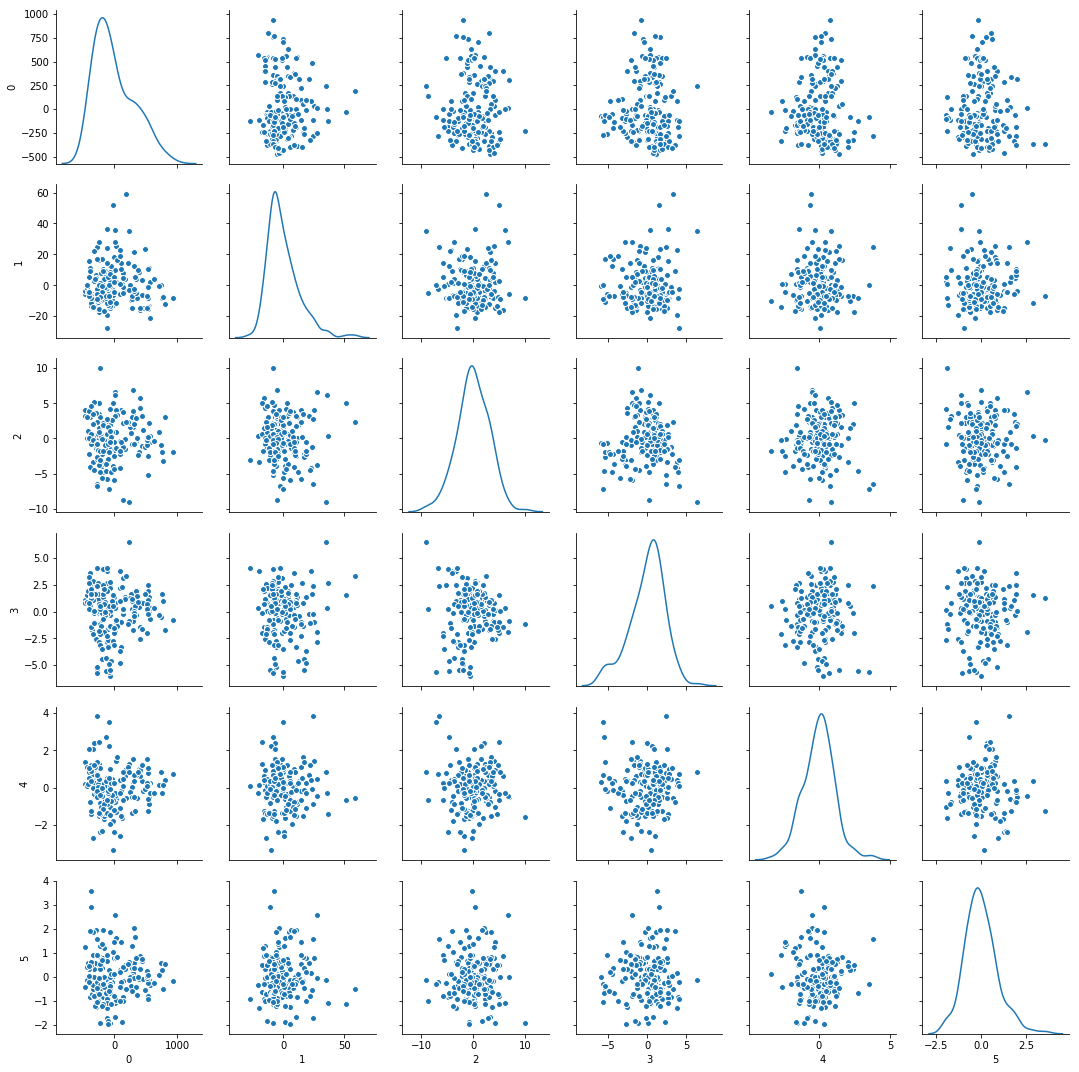

In [26]:
#Let us check it visually


mpg_df_attr = X_reduced.iloc[:, :]
sns.pairplot(mpg_df_attr, diag_kind='kde') 

In [27]:
# Splitting data into training set and test set for linear regression model which is a supervised method 
# Centralize the data with standard scalar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)



In [28]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 6 to 4)

X_train_reduced = PCA(n_components=6).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=6).fit_transform(X_test_std)

In [29]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [30]:
dt_model.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dt_model.score(X_test_reduced , y_test)      # performance on test data

0.8148148148148148

#                                      Regularising the Decision Tree

In [32]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
test_pred = dt_model.predict(test_set)

In [34]:
dt_model.score(test_set , test_labels)

0.9629629629629629

#                             Ensemble Learning - Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(train_set, train_labels)
bgcl.oob_score_     ### testing the ensemble against OOB

0.9112903225806451

In [36]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.9814814814814815

#                    Ensemble Learning - AdaBoosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)


In [38]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.5370370370370371

#                     Ensemble Learning - GradientBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)


In [40]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.9629629629629629

#                    Ensemble RandomForest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)


In [42]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.9814814814814815

# MODEL Comparison

In [45]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


LR: 0.944444 (0.060858)
LDA: 0.961111 (0.035573)
KNN: 0.631046 (0.215931)
CART: 0.849020 (0.110763)
NB: 0.961111 (0.055833)
SVM: 0.172876 (0.186266)


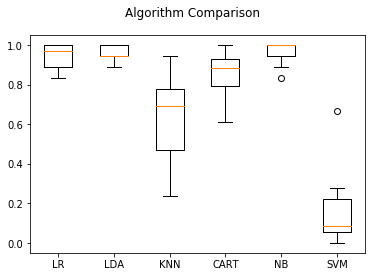

In [47]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

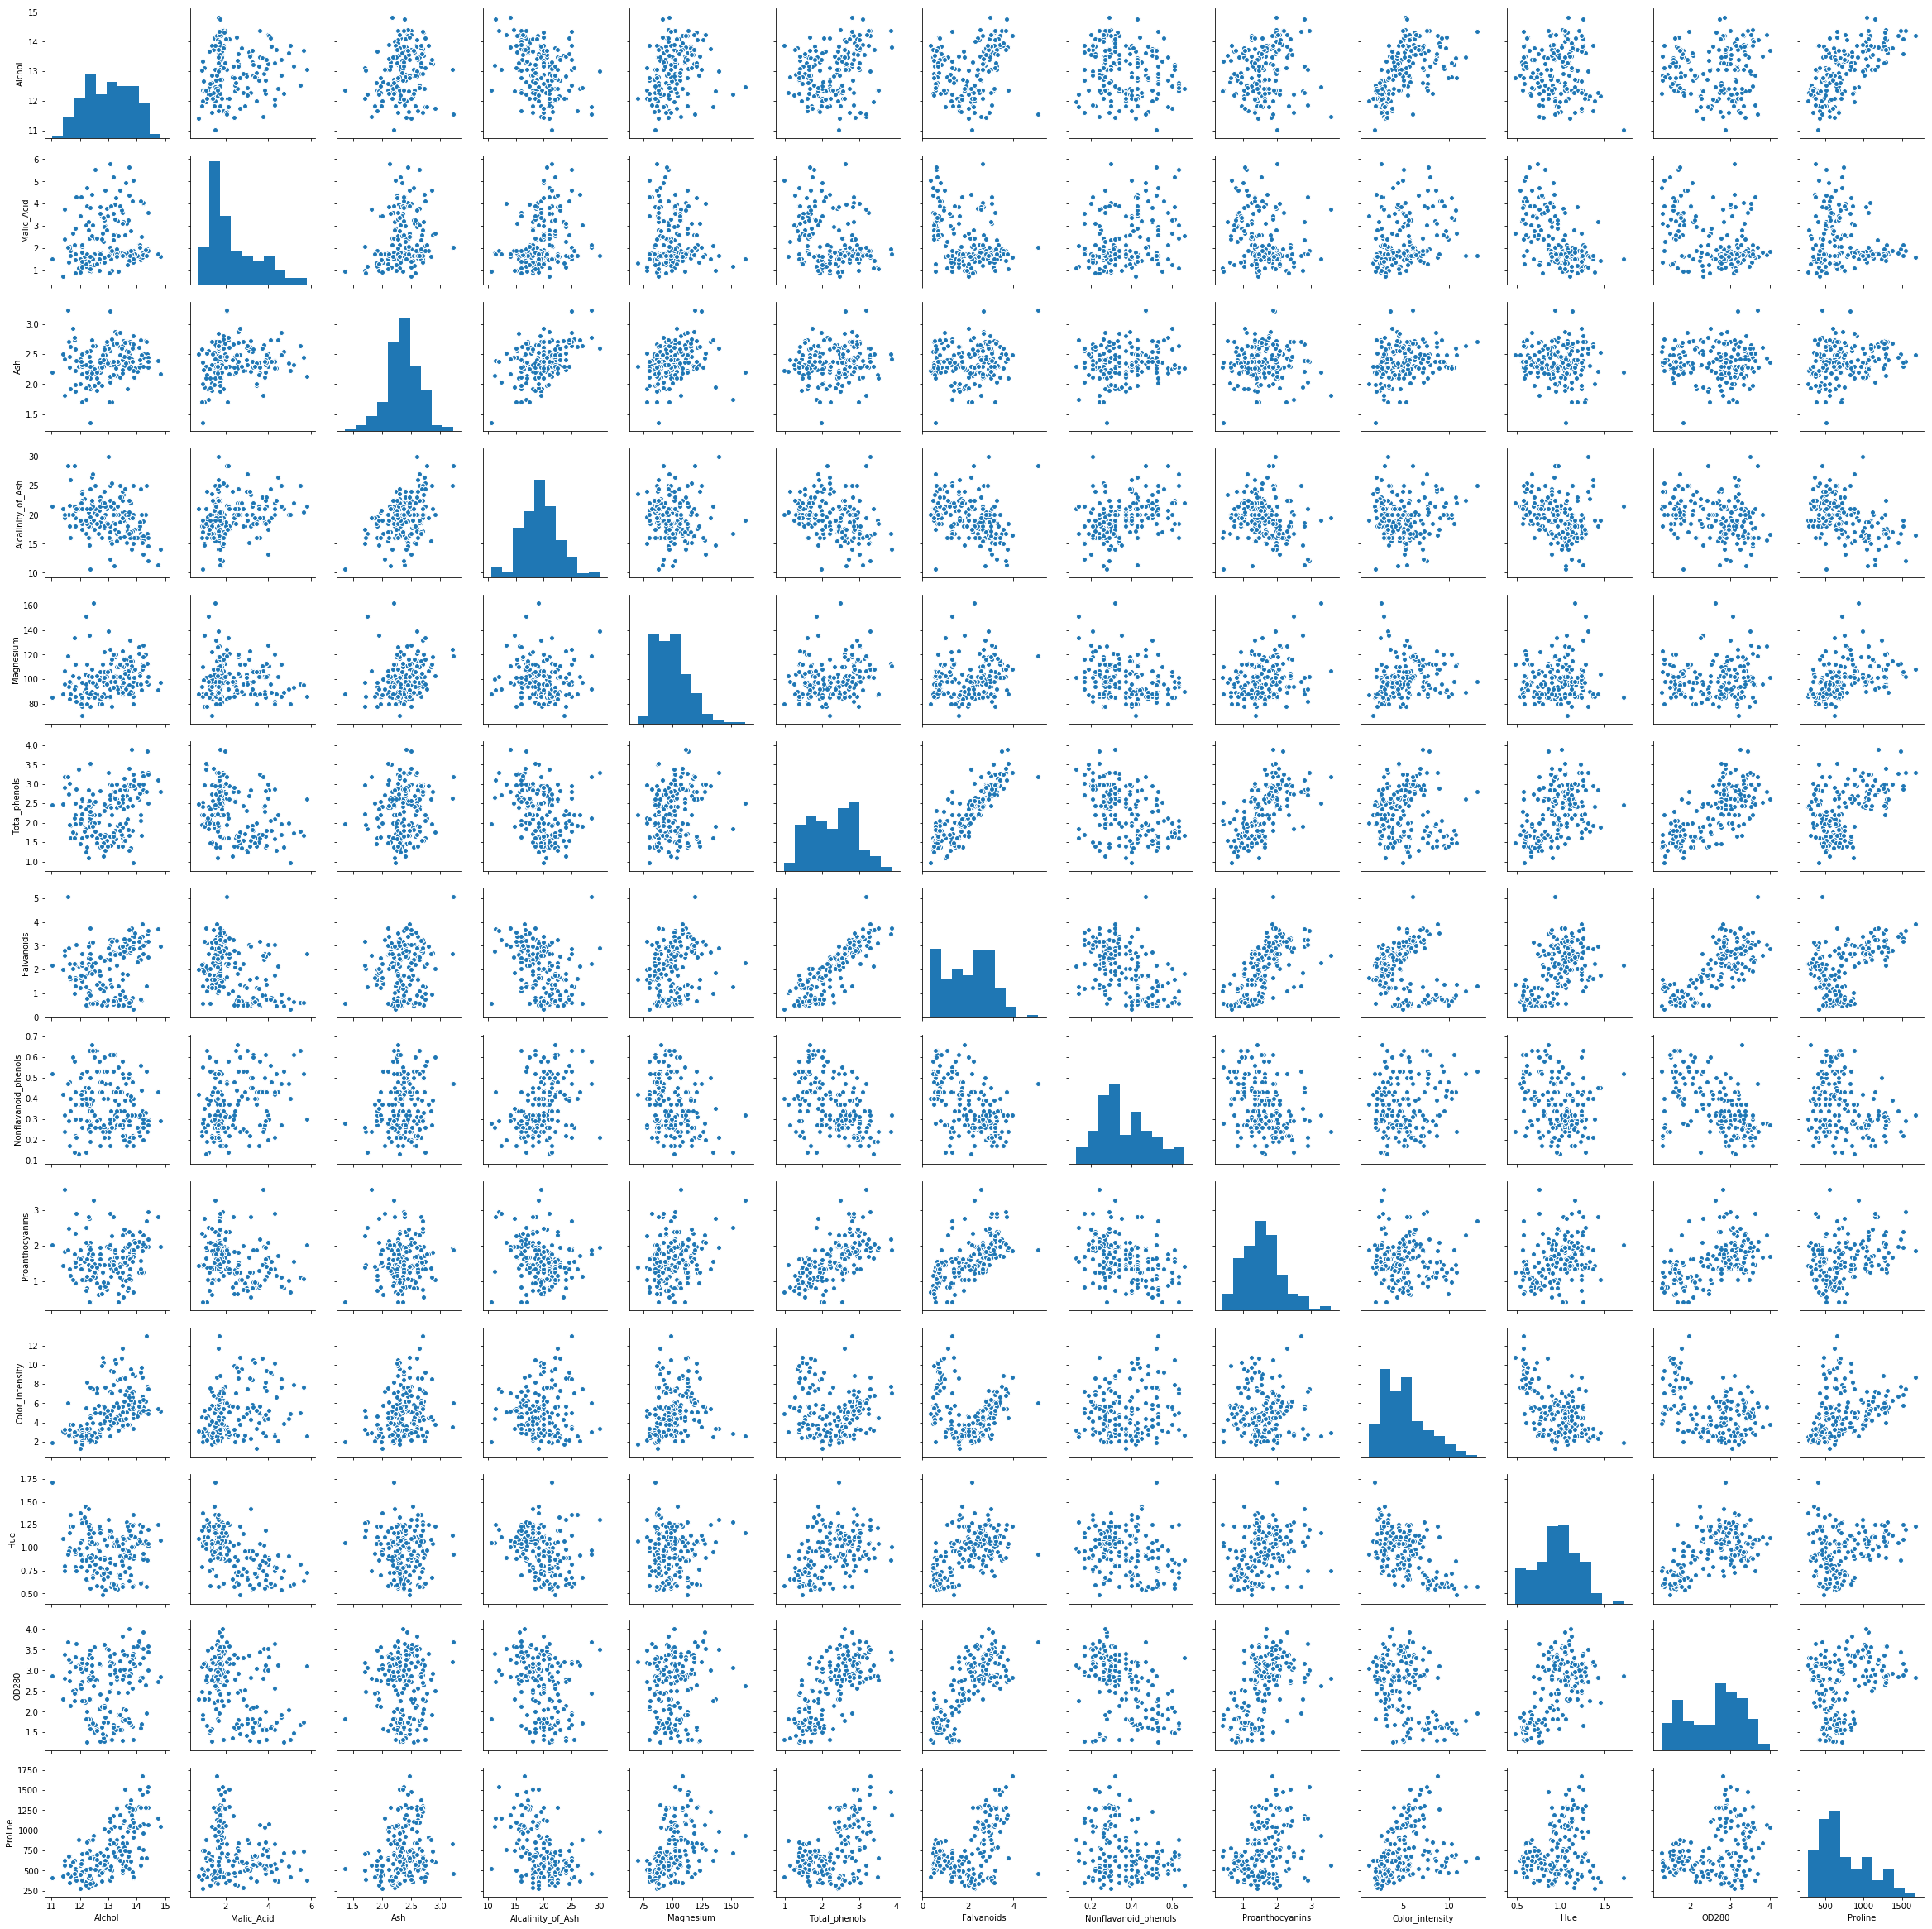

In [48]:
import seaborn as sns
sns.pairplot(wine_df)